<h1>Unemployment Rates from 1948-2021</h1>

<p>The following data analysis represents the unemployment rates in the United States for the past 73 years broken down by gender and age groups.</p>

<p>From this, we can predict unemployment rates for the future, both by overall population and by specific groups.</p>
<p><em>Note that this data is from the </em>US Bureau of Labor Statistics, <em>and reflects the percentage of the population that filed for unemployment assistance and was accepted into the program. Therefore, there is room for error. The predictions based on these patterns are still accurate within reason, however, as they show the social changes that affect the US over time. (Such as women entering the workforce, minor&#39;s unemployment, retirement trends, etc).</em></p>

In [3]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
import ipywidgets as widgets
from IPython.display import *
from numpy import *
from matplotlib.pyplot import *
from pandas.plotting import *
from sklearn import *
from sklearn.linear_model import *
from ipywidgets import *
import plotly.graph_objects as go

#these help format the graphs and other visuals, the warning line helps supress unecessary messages
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.rcParams["figure.figsize"]=7,7
warnings.filterwarnings('ignore')

data = pd.read_csv("C://Users//boswo//HunterStroudWGU//unemployment.csv")
print ("To demonstrate that the CSV file has been properly read in and to show a sample of the data:")
data.head(5)

To demonstrate that the CSV file has been properly read in and to show a sample of the data:


month  year  unrate  unrate_men  unrate_women  unrate_16_to_17  \
0      1  1948     4.0         4.2           3.5             10.8   
1      2  1948     4.7         4.7           4.8             15.0   
2      3  1948     4.5         4.5           4.4             13.2   
3      4  1948     4.0         4.0           4.1              9.9   
4      5  1948     3.4         3.3           3.4              6.4   

   unrate_18_to_19  unrate_20_to_24  unrate_25_to_34  unrate_35_to_44  \
0              9.6              6.6              3.6              2.6   
1              9.5              8.0              4.0              3.2   
2              9.3              8.6              3.5              3.2   
3              8.1              6.8              3.5              3.1   
4              7.2              6.3              2.8              2.5   

   unrate_45_to_54  unrate_55_over  
0              2.7             3.6  
1              3.4             4.0  
2              2.9             3.5  
3              2.9             3.2  
4              2.3             2.9

In [2]:
print ("A summary of the data:")
#this is mostly to ensure there are no gaps in the data.
#all columns have a count of 887, meaning there are no missing values
data.describe()


A summary of the data:


month         year      unrate  unrate_men  unrate_women  \
count  887.000000   887.000000  887.000000  887.000000    887.000000   
mean     6.493799  1984.458850    5.763134    5.633709      6.028749   
std      3.450998    21.348877    1.740101    1.954639      1.608252   
min      1.000000  1948.000000    2.400000    1.900000      2.600000   
25%      3.500000  1966.000000    4.500000    4.300000      4.900000   
50%      6.000000  1984.000000    5.500000    5.300000      5.800000   
75%      9.000000  2003.000000    6.800000    6.700000      7.000000   
max     12.000000  2021.000000   14.400000   13.300000     15.700000   

       unrate_16_to_17  unrate_18_to_19  unrate_20_to_24  unrate_25_to_34  \
count       887.000000       887.000000       887.000000       887.000000   
mean         17.943517        14.824803         9.345660         5.532582   
std           5.018894         4.047867         2.800988         1.923600   
min           5.700000         5.200000         3.300000         2.000000   
25%          14.700000        12.300000         7.700000         4.200000   
50%          17.800000        14.600000         9.100000         5.200000   
75%          20.900000        17.000000        10.800000         6.700000   
max          35.800000        33.300000        25.000000        14.300000   

       unrate_35_to_44  unrate_45_to_54  unrate_55_over  
count       887.000000       887.000000      887.000000  
mean          4.242954         3.867193        3.838782  
std           1.443626         1.352247        1.241579  
min           1.600000         1.500000        1.500000  
25%           3.200000         2.950000        3.000000  
50%           4.000000         3.600000        3.600000  
75%           5.000000         4.500000        4.400000  
max          11.300000        12.100000       13.400000

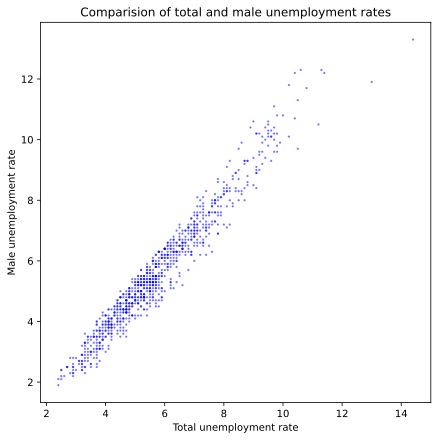

In [3]:
#first scatterplot, for men to total unemployment rates
x = data['unrate'].to_numpy().reshape(-1,1)
y = data['unrate_men'].to_numpy().reshape(-1,1)
fig, plot1 = plt.subplots()
plot1.scatter(x, y, s=2, alpha=0.4, c='b')
plot1.set_title('Comparision of total and male unemployment rates')
plot1.set_xlabel('Total unemployment rate')
plot1.set_ylabel('Male unemployment rate')
plt.show()

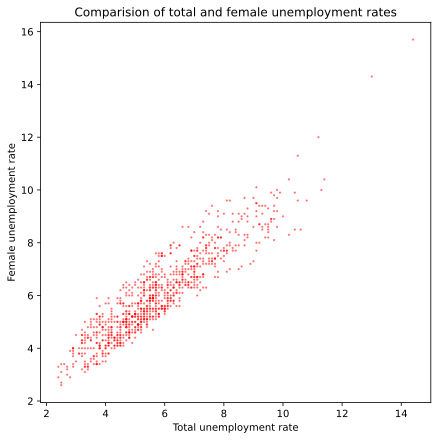

In [4]:
#second scatterplot, for women to total unemployment
z = data['unrate_women'].to_numpy().reshape(-1,1)
fig, plot2 = plt.subplots()
plot2.scatter(x, z, s=2, alpha=0.4, c='r')
plot2.set_title('Comparision of total and female unemployment rates')
plot2.set_xlabel('Total unemployment rate')
plot2.set_ylabel('Female unemployment rate')
plt.show()



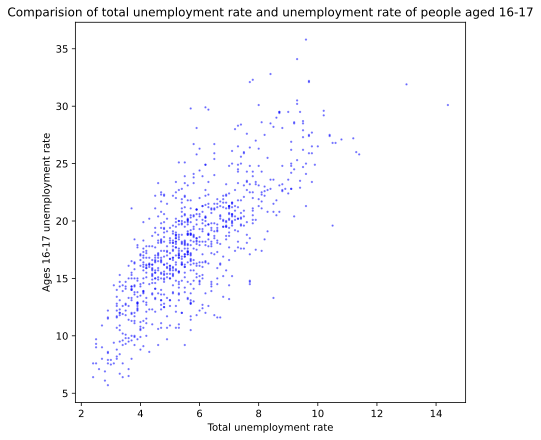

In [5]:
#third scatter, for ages 16-17
age1 = data['unrate_16_to_17'].to_numpy().reshape(-1,1)
fig, plot3 = plt.subplots()
plot3.scatter(x, age1, s=2, alpha=0.4, c='b')
plot3.set_title('Comparision of total unemployment rate and unemployment rate of people aged 16-17')
plot3.set_xlabel('Total unemployment rate')
plot3.set_ylabel('Ages 16-17 unemployment rate')
plt.show()


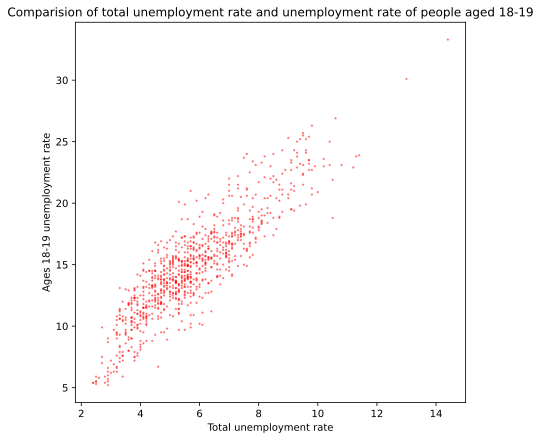

In [6]:
#fourth, ages 18-19
age2 = data['unrate_18_to_19'].to_numpy().reshape(-1,1)
fig, plot4 = plt.subplots()
plot4.scatter(x, age2, s=2, alpha=0.4, c='r')
plot4.set_title('Comparision of total unemployment rate and unemployment rate of people aged 18-19')
plot4.set_xlabel('Total unemployment rate')
plot4.set_ylabel('Ages 18-19 unemployment rate')
plt.show()


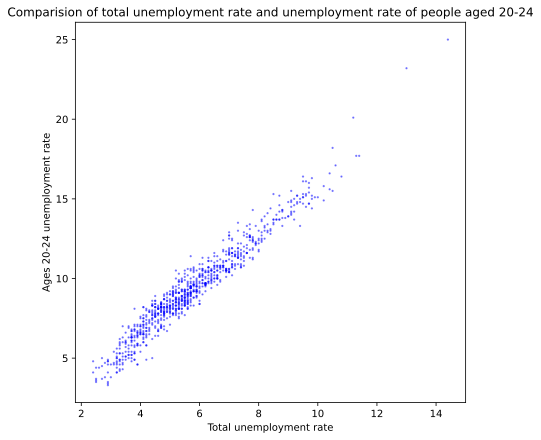

In [7]:
#fifth, ages 20-24
age3 = data['unrate_20_to_24'].to_numpy().reshape(-1,1)
fig, plot5 = plt.subplots()
plot5.scatter(x, age3, s=2, alpha=0.4, c='b')
plot5.set_title('Comparision of total unemployment rate and unemployment rate of people aged 20-24')
plot5.set_xlabel('Total unemployment rate')
plot5.set_ylabel('Ages 20-24 unemployment rate')
plt.show()

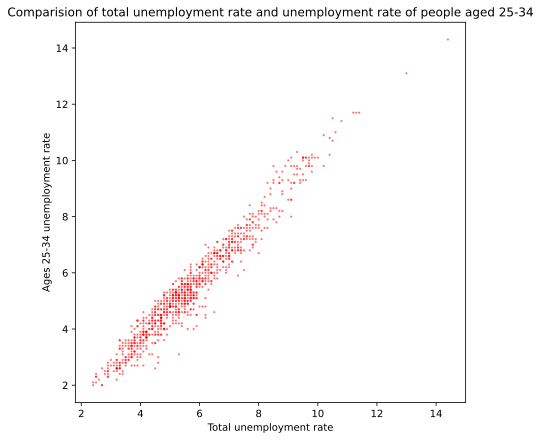

In [8]:
#sixth, ages 25-34
age4 = data['unrate_25_to_34'].to_numpy().reshape(-1,1)
fig, plot6 = plt.subplots()
plot6.scatter(x, age4, s=2, alpha=0.4, c='r')
plot6.set_title('Comparision of total unemployment rate and unemployment rate of people aged 25-34')
plot6.set_xlabel('Total unemployment rate')
plot6.set_ylabel('Ages 25-34 unemployment rate')
plt.show()

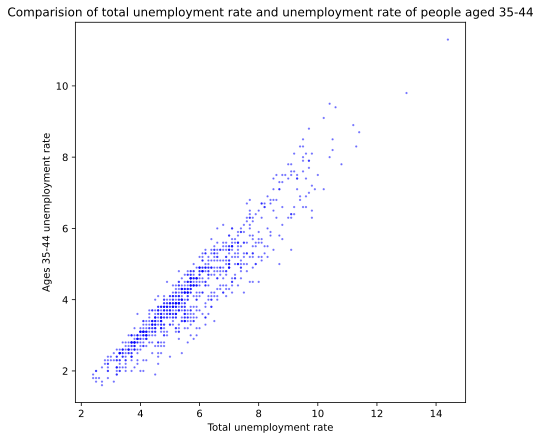

In [9]:
#seventh, ages 35-44
age5 = data['unrate_35_to_44'].to_numpy().reshape(-1,1)
fig, plot7 = plt.subplots()
plot7.scatter(x, age5, s=2, alpha=0.4, c='b')
plot7.set_title('Comparision of total unemployment rate and unemployment rate of people aged 35-44')
plot7.set_xlabel('Total unemployment rate')
plot7.set_ylabel('Ages 35-44 unemployment rate')
plt.show()

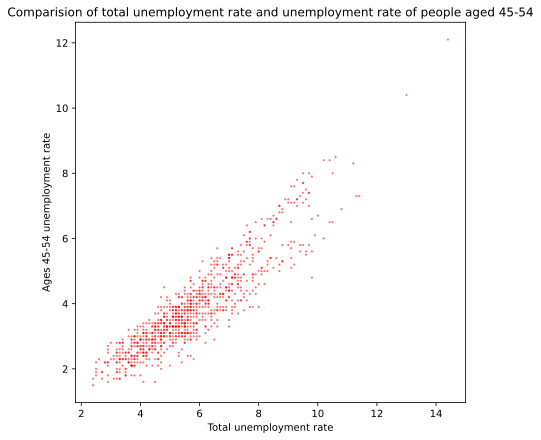

In [10]:
#eighth, ages 45-54
age6 = data['unrate_45_to_54'].to_numpy().reshape(-1,1)
fig, plot8 = plt.subplots()
plot8.scatter(x, age6, s=2, alpha=0.4, c='r')
plot8.set_title('Comparision of total unemployment rate and unemployment rate of people aged 45-54')
plot8.set_xlabel('Total unemployment rate')
plot8.set_ylabel('Ages 45-54 unemployment rate')
plt.show()

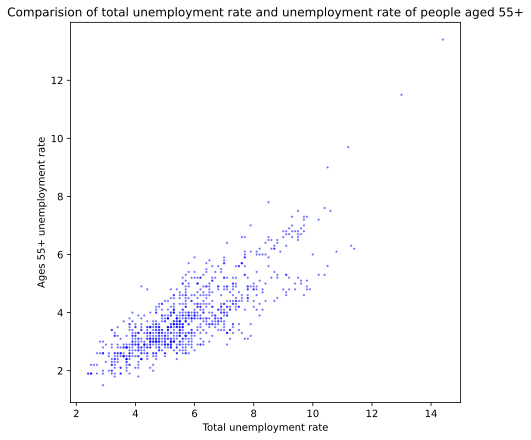

In [11]:
#ninth and last, ages 55 and over
age7 = data['unrate_55_over'].to_numpy().reshape(-1,1)
fig, plot9 = plt.subplots()
plot9.scatter(x, age7, s=2, alpha=0.4, c='b')
plot9.set_title('Comparision of total unemployment rate and unemployment rate of people aged 55+')
plot9.set_xlabel('Total unemployment rate')
plot9.set_ylabel('Ages 55+ unemployment rate')
plt.show()


#These were kept in separate cells for easy editing. 
#There were lines of code to save these graphs, which have since been deleted. 
#The graphs are available as png in the project folder.

<p>From these displays, we can see that unemployment rates for people ages 20-54 are fairly linear, with people 19 and younger and 55 and older being less linear. This is most likely due to the employment trends of those age groups, such as young people going to school or being supported by their families and older people being eligable for retirement instead of applying for unemployment.</p>

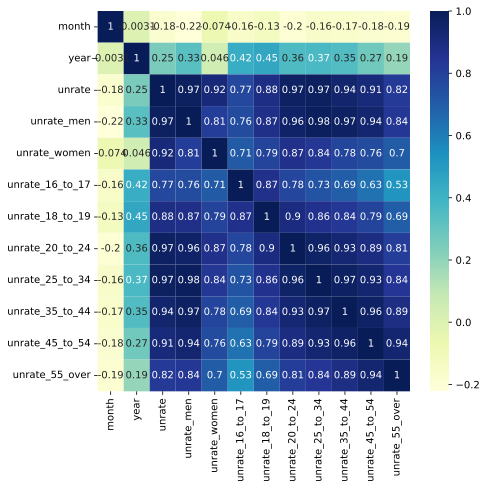

In [12]:
#to show correlation between the data
#year and month aren't very correlated due to the nature of unemployment's fluctuations. 
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

<p>From this heat map, we can see that much of the data is highly correlated. This can be attributed to the nature of the data. When overall unemployment rates are higher, the unemployment rates for specific groups of people will also likely be higher. Most areas with very little correlation are due to the data type (year and month).</p>


In [13]:
from sklearn.model_selection import train_test_split
#an import that is specific to the machine learning, brought down here for easy access while working.

#reiterating variables for use in machine learning, and the creation of the train test split.
month = data['month']
unrate = data['unrate']
men = data['unrate_men']
women = data['unrate_women']
age1 = data['unrate_16_to_17']
age2 = data['unrate_18_to_19']
age3 = data['unrate_20_to_24']
age4 = data['unrate_25_to_34']
age5 = data['unrate_35_to_44']
age6 = data['unrate_45_to_54']
age7 = data['unrate_55_over']
, 
month_train, month_test, unrate_train, unrate_test, men_train, men_test, women_train, women_test, age1_train, age1_test, age2_train, age2_test, age3_train, age3_test, age4_train, age4_test, age5_train, age5_test, age6_train, age6_test, age7_train, age7_test = train_test_split(month, unrate, men, women, age1, age2, age3, age4, age5, age6, age7 , train_size = 0.7, test_size = 0.3, random_state = 100)

In [14]:
#more building the test model, all of these have no immediate output and were easily grouped together.
unrate_train_sm = sm.add_constant(unrate_train)
men_train_sm = sm.add_constant(men_train)
women_train_sm = sm.add_constant(women_train)
age1_train_sm = sm.add_constant(age1_train)
age2_train_sm = sm.add_constant(age2_train)
age3_train_sm = sm.add_constant(age3_train)
age4_train_sm = sm.add_constant(age4_train)
age5_train_sm = sm.add_constant(age5_train)
age6_train_sm = sm.add_constant(age6_train)
age7_train_sm = sm.add_constant(age7_train)

In [15]:
#the ouput of these printed better with the ability to use summary() without the print function
#thus requiring each category to have its own cell
lr_men = sm.OLS(men_train, unrate_train_sm).fit()
print (lr_men.params)
lr_men.summary()



const    -0.650525
unrate    1.088896
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             unrate_men   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                 1.115e+04
Date:                Wed, 12 Jan 2022   Prob (F-statistic):               0.00
Time:                        10:43:50   Log-Likelihood:                -374.95
No. Observations:                 620   AIC:                             753.9
Df Residuals:                     618   BIC:                             762.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6505      0.062    -10.484      0.000      -0.772      -0.529
unrate         1.0889      0.010    105.581      0.000       1.069       1.109
==============================================================================
Omnibus:                       18.352   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.817
Skew:                          -0.379   Prob(JB):                     4.97e-05
Kurtosis:                       3.437   Cond. No.                         21.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
#the women's cell
lr_women = sm.OLS(women_train, unrate_train_sm).fit()
print (lr_women.params)
lr_women.summary()


const     1.094199
unrate    0.857822
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           unrate_women   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     3252.
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          2.32e-248
Time:                        10:43:50   Log-Likelihood:                -608.99
No. Observations:                 620   AIC:                             1222.
Df Residuals:                     618   BIC:                             1231.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0942      0.091     12.090      0.000       0.916       1.272
unrate         0.8578      0.015     57.024      0.000       0.828       0.887
==============================================================================
Omnibus:                       29.318   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.742
Skew:                           0.561   Prob(JB):                     7.76e-08
Kurtosis:                       2.918   Cond. No.                         21.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
#ages 16-17
lr_age1 = sm.OLS(age1_train, unrate_train_sm).fit()
print (lr_age1.params)
lr_age1.summary()


const     4.900316
unrate    2.259923
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        unrate_16_to_17   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     927.2
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          4.35e-125
Time:                        10:43:50   Log-Likelihood:                -1598.6
No. Observations:                 620   AIC:                             3201.
Df Residuals:                     618   BIC:                             3210.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9003      0.447     10.974      0.000       4.023       5.777
unrate         2.2599      0.074     30.449      0.000       2.114       2.406
==============================================================================
Omnibus:                       13.487   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.960
Skew:                           0.222   Prob(JB):                     0.000126
Kurtosis:                       3.705   Cond. No.                         21.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
#ages 18-19
lr_age2 = sm.OLS(age2_train, unrate_train_sm).fit()
print (lr_age2.params)
lr_age2.summary()


const     2.736856
unrate    2.086720
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        unrate_18_to_19   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     2179.
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          9.13e-205
Time:                        10:43:50   Log-Likelihood:                -1284.3
No. Observations:                 620   AIC:                             2573.
Df Residuals:                     618   BIC:                             2581.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7369      0.269     10.176      0.000       2.209       3.265
unrate         2.0867      0.045     46.677      0.000       1.999       2.175
==============================================================================
Omnibus:                        3.019   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.221   Jarque-Bera (JB):                2.967
Skew:                           0.169   Prob(JB):                        0.227
Kurtosis:                       3.002   Cond. No.                         21.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
#ages20-24
lr_age3 = sm.OLS(age3_train, unrate_train_sm).fit()
print (lr_age3.params)
lr_age3.summary()


const     0.403059
unrate    1.552814
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        unrate_20_to_24   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 1.003e+04
Date:                Wed, 12 Jan 2022   Prob (F-statistic):               0.00
Time:                        10:43:50   Log-Likelihood:                -627.65
No. Observations:                 620   AIC:                             1259.
Df Residuals:                     618   BIC:                             1268.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4031      0.093      4.321      0.000       0.220       0.586
unrate         1.5528      0.016    100.164      0.000       1.522       1.583
==============================================================================
Omnibus:                        7.238   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                7.731
Skew:                           0.192   Prob(JB):                       0.0210
Kurtosis:                       3.389   Cond. No.                         21.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
#ages 25-34
lr_age4 = sm.OLS(age4_train, unrate_train_sm).fit()
print (lr_age4.params)
lr_age4.summary()

const    -0.661302
unrate    1.074757
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        unrate_25_to_34   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.056e+04
Date:                Wed, 12 Jan 2022   Prob (F-statistic):               0.00
Time:                        10:43:50   Log-Likelihood:                -383.73
No. Observations:                 620   AIC:                             771.5
Df Residuals:                     618   BIC:                             780.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6613      0.063    -10.508      0.000      -0.785      -0.538
unrate         1.0748      0.010    102.746      0.000       1.054       1.095
==============================================================================
Omnibus:                       49.544   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.642
Skew:                          -0.614   Prob(JB):                     7.54e-16
Kurtosis:                       4.090   Cond. No.                         21.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
#ages 35-44
lr_age5 = sm.OLS(age5_train, unrate_train_sm).fit()
print (lr_age5.params)
lr_age5.summary()

const    -0.227330
unrate    0.774572
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        unrate_35_to_44   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     4888.
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.05e-295
Time:                        10:43:50   Log-Likelihood:                -419.32
No. Observations:                 620   AIC:                             842.6
Df Residuals:                     618   BIC:                             851.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2273      0.067     -3.411      0.001      -0.358      -0.096
unrate         0.7746      0.011     69.917      0.000       0.753       0.796
==============================================================================
Omnibus:                       18.955   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.981
Skew:                          -0.409   Prob(JB):                     4.58e-05
Kurtosis:                       3.325   Cond. No.                         21.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
#ages 45-54
lr_age6 = sm.OLS(age6_train, unrate_train_sm).fit()
print (lr_age6.params)
lr_age6.summary()

const    -0.167378
unrate    0.697306
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        unrate_45_to_54   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     2956.
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.06e-237
Time:                        10:43:50   Log-Likelihood:                -510.06
No. Observations:                 620   AIC:                             1024.
Df Residuals:                     618   BIC:                             1033.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1674      0.077     -2.169      0.030      -0.319      -0.016
unrate         0.6973      0.013     54.373      0.000       0.672       0.722
==============================================================================
Omnibus:                        1.070   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.586   Jarque-Bera (JB):                0.896
Skew:                          -0.046   Prob(JB):                        0.639
Kurtosis:                       3.162   Cond. No.                         21.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
#ages 55+
lr_age7 = sm.OLS(age7_train, unrate_train_sm).fit()
print (lr_age7.params)
lr_age7.summary()

const     0.501025
unrate    0.576452
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         unrate_55_over   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     1232.
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          2.83e-149
Time:                        10:43:50   Log-Likelihood:                -663.40
No. Observations:                 620   AIC:                             1331.
Df Residuals:                     618   BIC:                             1340.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5010      0.099      5.071      0.000       0.307       0.695
unrate         0.5765      0.016     35.100      0.000       0.544       0.609
==============================================================================
Omnibus:                       89.677   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              247.483
Skew:                           0.721   Prob(JB):                     1.82e-54
Kurtosis:                       5.739   Cond. No.                         21.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h2>Below are the various categories compared to the total unemployment rate.</h2>

<p>The scatter maps are the same as the previous maps, with a line representing the best fit based on the model training.</p>

<p><em>Note that the unemployment trends of people ages 16-19 is varied greatly, causing the data to appear to be skewed. This can be explained by the inconsistencies of employment, education, etc, that typically affect people of those ages.</em></p>

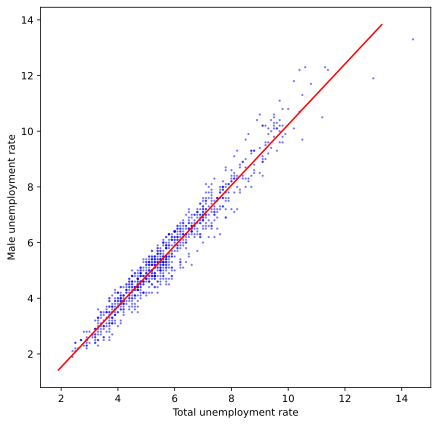

In [57]:
#once again, these graphs were contained to their own cells for ease of editing.
#this represents the best-fit line for men's unemployment
fig, plot1a = plt.subplots()
plot1a.scatter(x, y, s=2, alpha=0.4, c='b')
plot1a.plot(men_train, (-0.6505 + 1.0889*men_train), c = 'r')
plot1a.set_xlabel('Total unemployment rate')
plot1a.set_ylabel('Male unemployment rate')
plt.show()


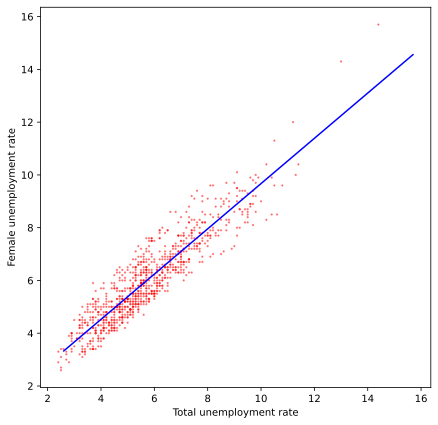

In [58]:
#this represents the best-fit line for women's unemployment
fig, plot2a = plt.subplots()
plot2a.scatter(x, z, s=2, alpha=0.4, c='r')
plot2a.plot(women_train, (1.0942 + 0.8578*women_train), c = 'b')
plot2a.set_xlabel('Total unemployment rate')
plot2a.set_ylabel('Female unemployment rate')
plt.show()



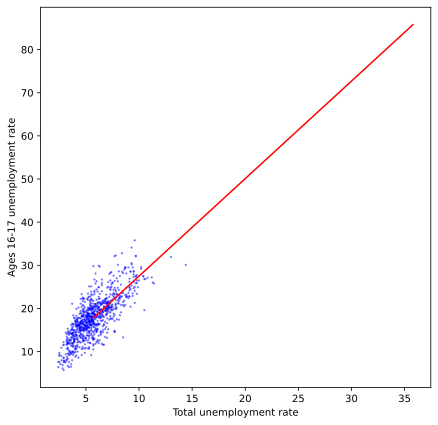

In [59]:
#this represents the best-fit line for ages 16-17 unemployment
#the graph looks extremely skewed. this is due to how the line of best fit was created. it is still within 5% accuracy.
fig, plot3a = plt.subplots()
plot3a.scatter(x, age1, s=2, alpha=0.4, c='b')
plot3a.plot(age1_train, (4.9003 + 2.2599*age1_train), c = 'r')
plot3a.set_xlabel('Total unemployment rate')
plot3a.set_ylabel('Ages 16-17 unemployment rate')
plt.show()

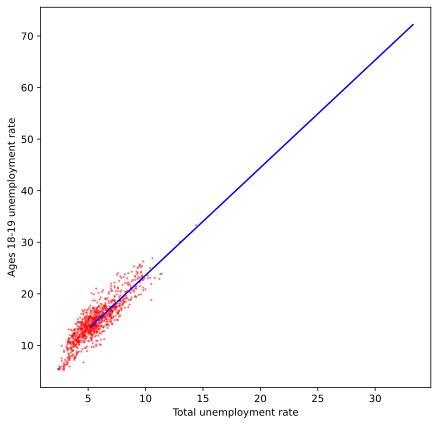

In [60]:
#this represents the best-fit line for ages 18-19 unemployment
#the graph looks extremely skewed. this is due to how the line of best fit was created. it is still within 5% accuracy.
fig, plot4a = plt.subplots()
plot4a.scatter(x, age2, s=2, alpha=0.4, c='r')
plot4a.plot(age2_train, (2.7369 + 2.0867*age2_train), c = 'b')
plot4a.set_xlabel('Total unemployment rate')
plot4a.set_ylabel('Ages 18-19 unemployment rate')
plt.show()

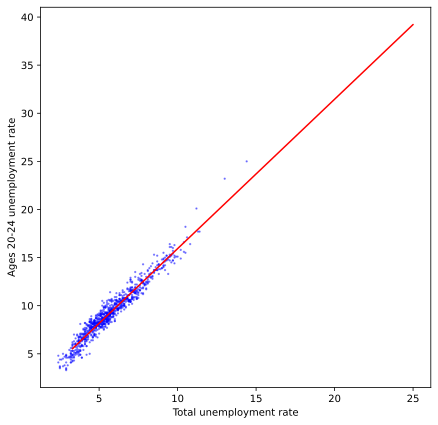

In [61]:
#this represents the best-fit line for ages 20-24 unemployment
fig, plot5a = plt.subplots()
plot5a.scatter(x, age3, s=2, alpha=0.4, c='b')
plot5a.plot(age3_train, (0.4031 + 1.5528*age3_train), c = 'r')
plot5a.set_xlabel('Total unemployment rate')
plot5a.set_ylabel('Ages 20-24 unemployment rate')
plt.show()

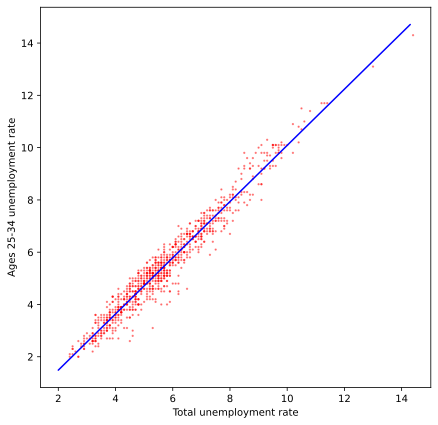

In [62]:
#this represents the best-fit line for ages 25-34 unemployment
fig, plot6a = plt.subplots()
plot6a.scatter(x, age4, s=2, alpha=0.4, c='r')
plot6a.plot(age4_train, (-0.6613 + 1.0748*age4_train), c = 'b')
plot6a.set_xlabel('Total unemployment rate')
plot6a.set_ylabel('Ages 25-34 unemployment rate')
plt.show()

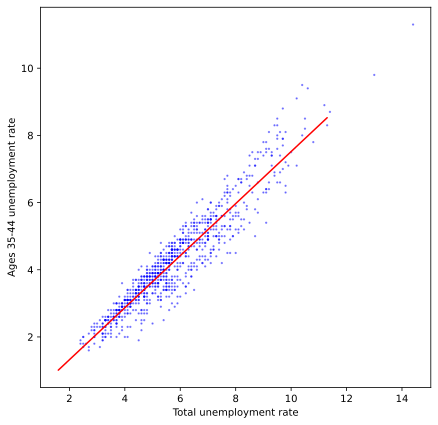

In [63]:
#this represents the best-fit line for ages 35-44 unemployment
fig, plot7a = plt.subplots()
plot7a.scatter(x, age5, s=2, alpha=0.4, c='b')
plot7a.plot(age5_train, (-0.2273 + 0.7746*age5_train), c = 'r')
plot7a.set_xlabel('Total unemployment rate')
plot7a.set_ylabel('Ages 35-44 unemployment rate')
plt.show()

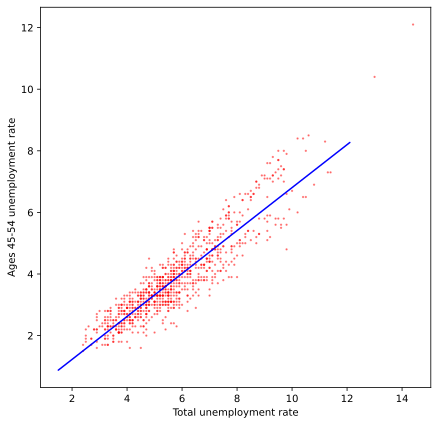

In [64]:
#this represents the best-fit line for ages 45-54 unemployment
fig, plot8a = plt.subplots()
plot8a.scatter(x, age6, s=2, alpha=0.4, c='r')
plot8a.plot(age6_train, (-0.1674 + 0.6973*age6_train), c = 'b')
plot8a.set_xlabel('Total unemployment rate')
plot8a.set_ylabel('Ages 45-54 unemployment rate')
plt.show()

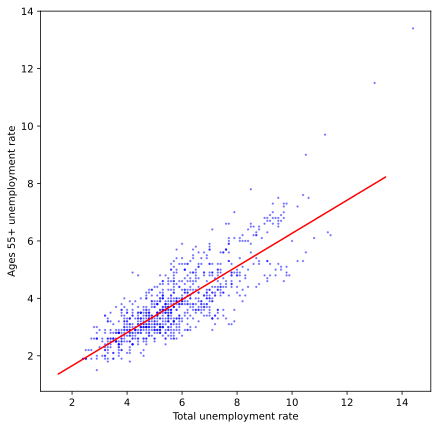

In [65]:
#this represents the best-fit line for ages 55+ unemployment
fig, plot9a = plt.subplots()
plot9a.scatter(x, age7, s=2, alpha=0.4, c='b')
plot9a.plot(age7_train, (0.5010 + 0.5765*age7_train), c = 'r')
plot9a.set_xlabel('Total unemployment rate')
plot9a.set_ylabel('Ages 55+ unemployment rate')
plt.show()

In [33]:
#more model training, this time to find the residual data and find the margin of error.
unrate_train_pred1 = lr_men.predict(men_train_sm)
unrate_train_pred2 = lr_women.predict(women_train_sm)
unrate_train_pred3 = lr_age1.predict(age1_train_sm)
unrate_train_pred4 = lr_age2.predict(age2_train_sm)
unrate_train_pred5 = lr_age3.predict(age3_train_sm)
unrate_train_pred6 = lr_age4.predict(age4_train_sm)
unrate_train_pred7 = lr_age5.predict(age5_train_sm)
unrate_train_pred8 = lr_age6.predict(age6_train_sm)
unrate_train_pred9 = lr_age7.predict(age7_train_sm)

res1=(unrate_train - unrate_train_pred1)
res2=(unrate_train - unrate_train_pred2)
res3=(unrate_train - unrate_train_pred3)
res4=(unrate_train - unrate_train_pred4)
res5=(unrate_train - unrate_train_pred5)
res6=(unrate_train - unrate_train_pred6)
res7=(unrate_train - unrate_train_pred7)
res8=(unrate_train - unrate_train_pred8)
res9=(unrate_train - unrate_train_pred9)

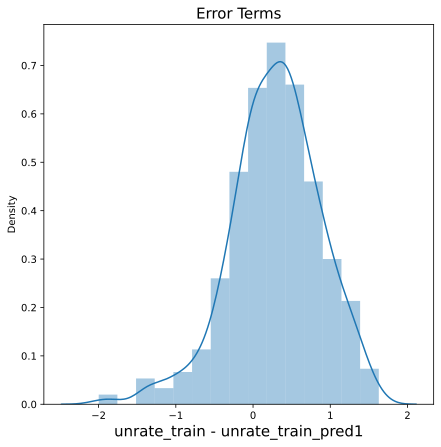

In [66]:
#plotting the margin of error, aiming for a bell curve to represent a normal distribution. 
#again, graphs are in their own cells for ease of editing.
#men
fig = plt.figure()
sns.distplot(res1, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('unrate_train - unrate_train_pred1', fontsize = 15)
plt.show()

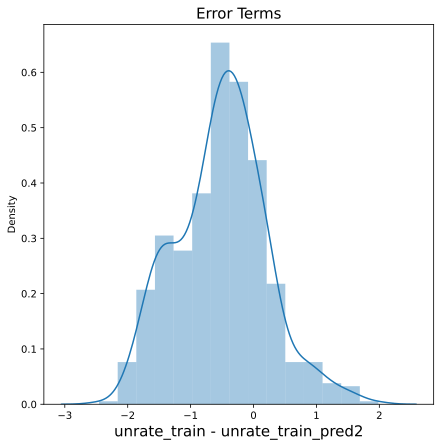

In [67]:
#women
#a bit wonky but still mostly within a normal bell curve.
fig = plt.figure()
sns.distplot(res2, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('unrate_train - unrate_train_pred2', fontsize = 15)
plt.show()

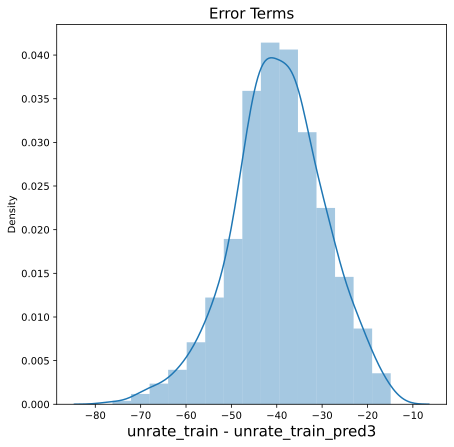

In [68]:
#ages 16-17
fig = plt.figure()
sns.distplot(res3, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('unrate_train - unrate_train_pred3', fontsize = 15)
plt.show()

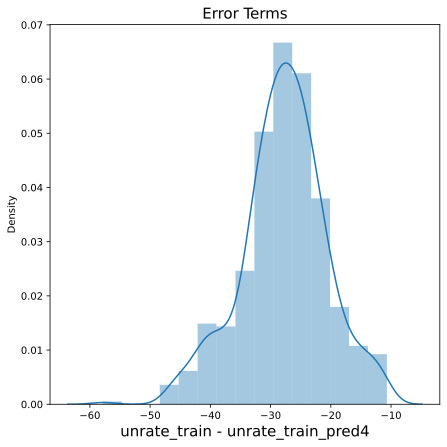

In [69]:
#ages 18-19
fig = plt.figure()
sns.distplot(res4, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('unrate_train - unrate_train_pred4', fontsize = 15)
plt.show()

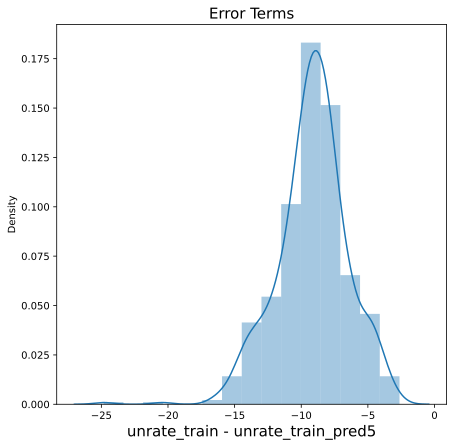

In [70]:
#ages 20-24
fig = plt.figure()
sns.distplot(res5, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('unrate_train - unrate_train_pred5', fontsize = 15)
plt.show()

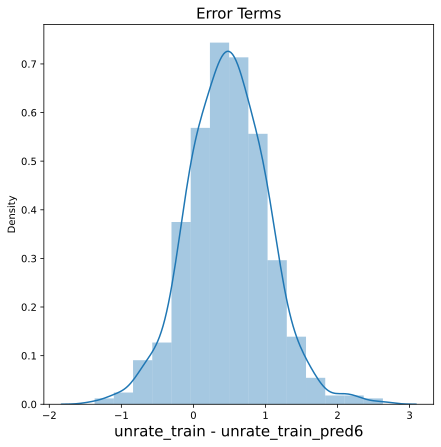

In [71]:
#ages 25-34
fig = plt.figure()
sns.distplot(res6, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('unrate_train - unrate_train_pred6', fontsize = 15)
plt.show()

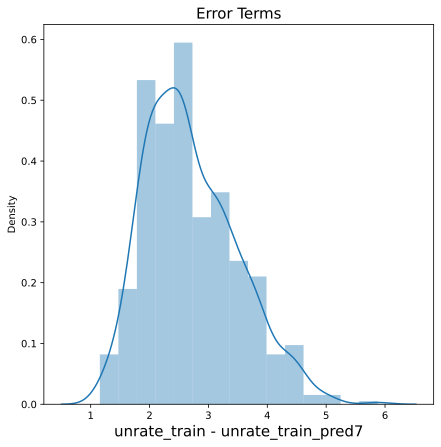

In [72]:
#ages 35-44
#also a bit wonky, but still mostly within an expected curve
fig = plt.figure()
sns.distplot(res7, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('unrate_train - unrate_train_pred7', fontsize = 15)
plt.show()

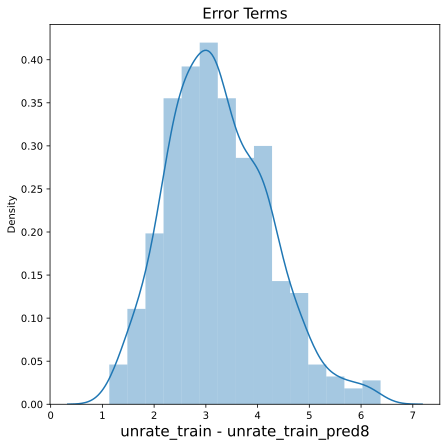

In [73]:
#ages 45-54
fig = plt.figure()
sns.distplot(res8, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('unrate_train - unrate_train_pred8', fontsize = 15)
plt.show()

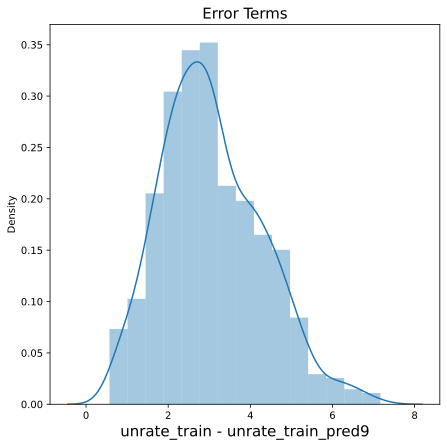

In [74]:
#ages 55+
fig = plt.figure()
sns.distplot(res9, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('unrate_train - unrate_train_pred9', fontsize = 15)
plt.show()

In [43]:
#testing the predictive nature of the models, all able to be done within one cell
unrate_test_sm = sm.add_constant(unrate_test)
men_test_pred = lr_men.predict(unrate_test_sm)
print (men_test_pred)
women_test_pred = lr_women.predict(unrate_test_sm)
print (women_test_pred)
age1_test_pred = lr_age1.predict(unrate_test_sm)
print (age1_test_pred)
age2_test_pred = lr_age2.predict(unrate_test_sm)
print (age2_test_pred)
age3_test_pred = lr_age3.predict(unrate_test_sm)
print (age3_test_pred)
age4_test_pred = lr_age4.predict(unrate_test_sm)
print (age4_test_pred)
age5_test_pred = lr_age5.predict(unrate_test_sm)
print (age5_test_pred)
age6_test_pred = lr_age6.predict(unrate_test_sm)
print (age6_test_pred)
age7_test_pred = lr_age7.predict(unrate_test_sm)
print (age7_test_pred)

636     4.467286
146     5.991741
277     6.536189
482     5.773962
675     5.229514
         ...    
447     7.080637
105     2.725053
816     5.120624
413    10.020656
69      2.071715
Length: 267, dtype: float64
636    5.125960
146    6.326911
277    6.755822
482    6.155347
675    5.726436
         ...   
447    7.184733
105    3.753446
816    5.640654
413    9.500851
69     3.238753
Length: 267, dtype: float64
636    15.521953
146    18.685845
277    19.815806
482    18.233860
675    17.103899
         ...    
447    20.945768
105    11.906077
816    16.877907
413    27.047559
69     10.550123
Length: 267, dtype: float64
636    12.544438
146    15.465846
277    16.509206
482    15.048502
675    14.005142
         ...    
447    17.552565
105     9.205687
816    13.796470
413    23.186708
69      7.953655
Length: 267, dtype: float64
636     7.701283
146     9.875223
277    10.651630
482     9.564660
675     8.788253
         ...    
447    11.428036
105     5.216782
816     8.63297

In [44]:
from sklearn.metrics import r2_score
#imported here for ease of access

#these all are calculated with the test values, then compared to the r squared value from the 
r_squared1 = r2_score(men_test, men_test_pred)
print (r_squared1) 
#this is 0.955(rounded) compared to 0.947.
#difference of 0.8%

r_squared2 = r2_score(women_test, women_test_pred)
print (r_squared2)
#this is 0.852(rounded) compared to 0.840
#difference of 1.2%

r_squared3 = r2_score(age1_test, age1_test_pred)
print (r_squared3)
#this is 0.587(rounded) compared to 0.599
#difference of 1.2%

r_squared4 = r2_score(age2_test, age2_test_pred)
print (r_squared4)
#this is 0.782(rounded) compared to 0.779
#difference of 0.3%

r_squared5 = r2_score(age3_test, age3_test_pred)
print (r_squared5)
#this is 0.944(rounded) compared to 0.942
#difference of 0.2%

r_squared6 = r2_score(age4_test, age4_test_pred)
print (r_squared6)
#this is 0.957(rounded) compared to 0.945
#difference of 1.2%

r_squared7 = r2_score(age5_test, age5_test_pred)
print (r_squared7)
#this is 0.892(rounded) compared to 0.888
#difference of 0.4%

r_squared8 = r2_score(age6_test, age6_test_pred)
print (r_squared8)
#this is 0.830(rounded) compared to 0.827
#difference of 0.3%

r_squared9 = r2_score(age7_test, age7_test_pred)
print (r_squared9)
#this is 0.703(rounded) compared to 0.665
#difference of 3.8%

print('All of the above values are within 5% of the original R-squared values of their corresponding relationships.')

0.9545693262742269
0.8520687419040345
0.5871549056052298
0.7821789739681096
0.944338235625102
0.956973122538584
0.8922982874250849
0.8302891519562673
0.7025361638963241
All of the above values are within 5% of the original R-squared values of their corresponding relationships.


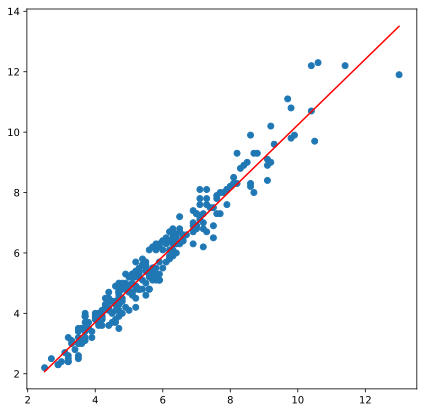

In [75]:
#showing the men's unemployment scatter with the line of best fit.
plt.scatter(unrate_test, men_test)
plt.plot(unrate_test, men_test_pred, 'r')
plt.show()

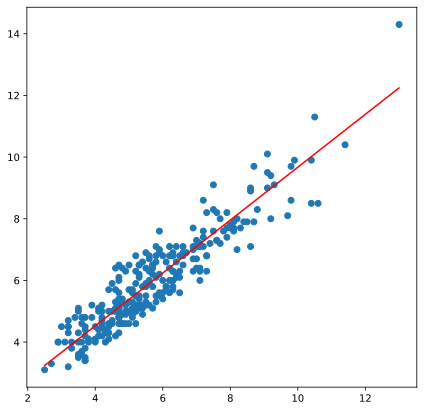

In [76]:
#showing the women's unemployment scatter with the line of best fit.
plt.scatter(unrate_test, women_test)
plt.plot(unrate_test, women_test_pred, 'r')
plt.show()

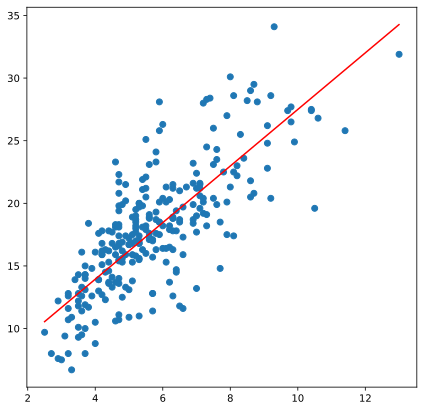

In [77]:
#showing ages 16-17 unemployment scatter with the line of best fit.
plt.scatter(unrate_test, age1_test)
plt.plot(unrate_test, age1_test_pred, 'r')
plt.show()

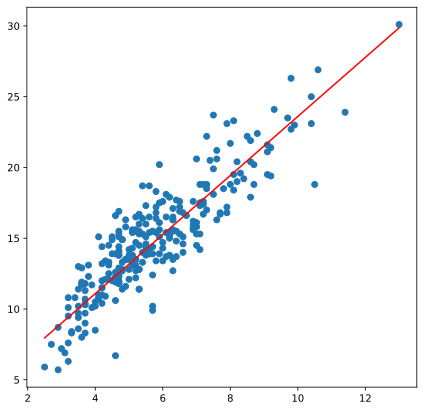

In [78]:
#showing ages 18-19 unemployment scatter with the line of best fit.
plt.scatter(unrate_test, age2_test)
plt.plot(unrate_test, age2_test_pred, 'r')
plt.show()

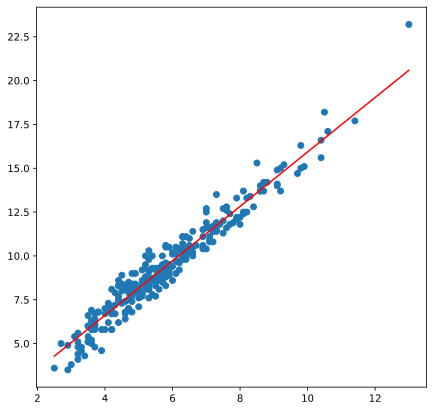

In [79]:
#showing ages 20-24 unemployment scatter with the line of best fit.
plt.scatter(unrate_test, age3_test)
plt.plot(unrate_test, age3_test_pred, 'r')
plt.show()

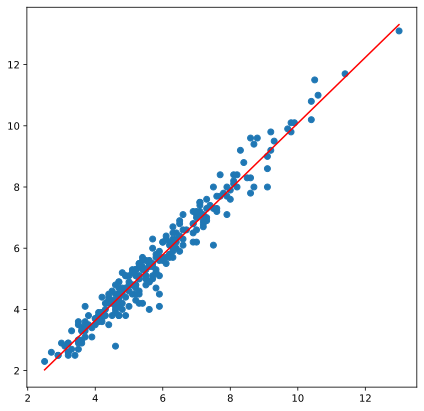

In [82]:
#showing ages 25-34 unemployment scatter with the line of best fit.
plt.scatter(unrate_test, age4_test)
plt.plot(unrate_test, age4_test_pred, 'r')
plt.show()

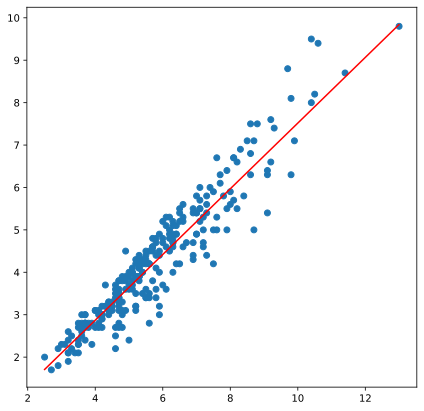

In [83]:
#showing ages 35-44 unemployment scatter with the line of best fit.
plt.scatter(unrate_test, age5_test)
plt.plot(unrate_test, age5_test_pred, 'r')
plt.show()

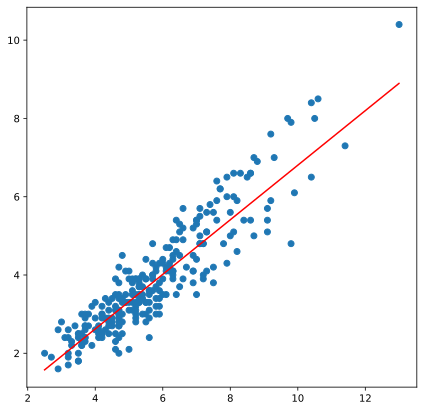

In [84]:
#showing ages 45-54 unemployment scatter with the line of best fit.
plt.scatter(unrate_test, age6_test)
plt.plot(unrate_test, age6_test_pred, 'r')
plt.show()

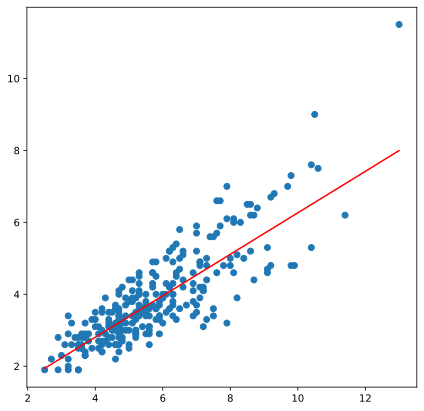

In [85]:
#showing ages 55+ unemployment scatter with the line of best fit.
plt.scatter(unrate_test, age7_test)
plt.plot(unrate_test, age7_test_pred, 'r')
plt.show()

In [54]:
#doublechecking the values with another means of machine learning.
unrate_train_lm, unrate_test_lm, men_train_lm, men_test_lm, women_train_lm, women_test_lm, age1_train_lm, age1_test_lm, age2_train_lm, age2_test_lm, age3_train_lm, age3_test_lm, age4_train_lm, age4_test_lm, age5_train_lm, age5_test_lm, age6_train_lm, age6_test_lm, age7_train_lm, age7_test_lm = train_test_split(unrate, men, women, age1, age2, age3, age4, age5, age6, age7, train_size = 0.7, test_size = 0.3, random_state = 100)

In [55]:
unrate_train_lm.shape

#checking the sizes of the dataset, they match the others
unrate_train_lm = unrate_train_lm.values.reshape(-1,1)
unrate_test_lm = unrate_test_lm.values.reshape(-1,1)

print(unrate_train_lm.shape)
print(unrate_test_lm.shape)

(620, 1)
(267, 1)


In [56]:
#printing the line for men's unemployment via slope/intercept
lm1 = LinearRegression()
lm1.fit(unrate_train_lm, men_train_lm)
print ('intercept: ', lm1.intercept_)
print ('slope: ', lm1.coef_)

#printing the line for women's unemployment via slope/intercept
lm2 = LinearRegression()
lm2.fit(unrate_train_lm, women_train_lm)
print ('intercept: ', lm2.intercept_)
print ('slope: ', lm2.coef_)

#printing the line for ages 16-17 unemployment via slope/intercept
lm3 = LinearRegression()
lm3.fit(unrate_train_lm, age1_train_lm)
print ('intercept: ', lm3.intercept_)
print ('slope: ', lm3.coef_)

#printing the line for ages 18-19 unemployment via slope/intercept
lm4 = LinearRegression()
lm4.fit(unrate_train_lm, age2_train_lm)
print ('intercept: ', lm4.intercept_)
print ('slope: ', lm4.coef_)

#printing the line for ages 20-24 unemployment via slope/intercept
lm5 = LinearRegression()
lm5.fit(unrate_train_lm, age3_train_lm)
print ('intercept: ', lm5.intercept_)
print ('slope: ', lm5.coef_)

#printing the line for ages 25-34 unemployment via slope/intercept
lm6 = LinearRegression()
lm6.fit(unrate_train_lm, age4_train_lm)
print ('intercept: ', lm6.intercept_)
print ('slope: ', lm6.coef_)

#printing the line for ages 35-44 unemployment via slope/intercept
lm7 = LinearRegression()
lm7.fit(unrate_train_lm, age5_train_lm)
print ('intercept: ', lm7.intercept_)
print ('slope: ', lm7.coef_)

#printing the line for ages 45-54 unemployment via slope/intercept
lm8 = LinearRegression()
lm8.fit(unrate_train_lm, age6_train_lm)
print ('intercept: ', lm8.intercept_)
print ('slope: ', lm8.coef_)

#printing the line for ages 55+ unemployment via slope/intercept
lm9 = LinearRegression()
lm9.fit(unrate_train_lm, age7_train_lm)
print ('intercept: ', lm9.intercept_)
print ('slope: ', lm9.coef_)

intercept:  -0.6505253261232324
slope:  [1.08889608]
intercept:  1.0941985746513074
slope:  [0.85782169]
intercept:  4.900316072248572
slope:  [2.25992276]
intercept:  2.736856050935433
slope:  [2.08671963]
intercept:  0.4030590624833863
slope:  [1.55281371]
intercept:  -0.6613017481825905
slope:  [1.07475709]
intercept:  -0.22732995018511737
slope:  [0.77457167]
intercept:  -0.16737779582433454
slope:  [0.69730597]
intercept:  0.5010247209730498
slope:  [0.57645247]


<h1>This means that the unemployment trends use the following equations relative to the overall unemployment rates:</h1>

<h2>Men&#39;s Rate = 1.089(unrate) - 0.651</h2>

<h2>Women&#39;s Rate = 0.858(unrate) + 1.094</h2>

<h2>Ages 16-17&#39;s Rate = 2.260(unrate) + 4.900</h2>

<h2>Ages 18-19&#39;s Rate = 2.087(unrate) + 2.737</h2>

<h2>Ages 20-24&#39;s Rate = 1.553(unrate) + 0.403</h2>

<h2>Ages 25-34&#39;s Rate = 1.075(unrate) - 0.661</h2>

<h2>Ages 35-44&#39;s Rate = 0.775(unrate) - 0.227</h2>

<h2>Ages 45-54&#39;s Rate = 0.697(unrate) - 0.167</h2>

<h2>Ages 55+&#39;s Rate = 0.576(unrate) + 0.501</h2>

<pre>

&nbsp;</pre>

<h1>Additional notes:</h1>

<p>The margin of error is highest for the unemployment projection for women, ages 16-17, and ages 55+. This makes sense due to social trends spanning the documented decades and socio-economic status for those groups.</p>

<pre>

&nbsp;</pre>